In [1]:
import pandas as pd

In [146]:
df_rfm = pd.read_csv('df_rfm.csv')

In [153]:
df_no_outliers = pd.read_csv('df_no_outliers.csv')

In [120]:
df_filtered = pd.read_csv('df_filtered.csv')

In [85]:
df_annulation = pd.read_csv('df_annulation.csv')

In [88]:
df_grossiste = pd.read_csv('df_grossiste.csv')

In [3]:
df_rfm.columns

Index(['Unnamed: 0', 'Customer ID', 'NombreCommandes', 'NombreArticles',
       'DateDerniereCommande', 'MontantTotal', 'CommandesAnnulees',
       'NombreCommandesNonAnnulees', 'PanierMoyen', 'Recency',
       'NombreArticlesMoyenParCommande', 'Country'],
      dtype='object')

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

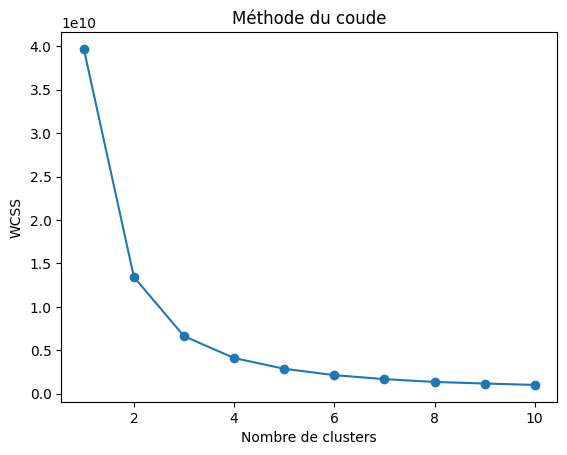

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler


variables = ['NombreCommandes','MontantTotal_y','Recency','PanierMoyen','PourcentageAnnulationMontant']
# Préparer les données et effectuer la normalisation
X = df_no_outliers[variables]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Liste pour stocker les valeurs des indices de performance (WCSS) pour différents nombres de clusters
wcss = []

# Définir une plage de valeurs pour le nombre de clusters à tester
range_clusters = range(1, 11)

# Appliquer K-means pour différents nombres de clusters et calculer l'indice de performance (WCSS)
for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Tracer la courbe de la méthode du coude
plt.plot(range_clusters, wcss, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.title('Méthode du coude')
plt.show()


In [164]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,MinMaxScaler, RobustScaler


# Sélectionner les variables pour la segmentation
variables = ['NombreCommandes','MontantTotal_y','Recency','PanierMoyen','PourcentageAnnulationMontant']
# Préparer les données et effectuer la normalisation
X = df_no_outliers[variables]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choix du nombre de clusters (k)
k = 4
# Appliquer l'algorithme K-means
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Ajouter les informations de segmentation au dataframe d'origine
df_no_outliers['Segment'] = kmeans.labels_

# Analyser les caractéristiques des clusters
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
df_cluster_centers = pd.DataFrame(cluster_centers, columns=variables)
display(df_cluster_centers)


/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,NombreCommandes,MontantTotal_y,Recency,PanierMoyen,PourcentageAnnulationMontant
0,18.314587,8129.798893,45.173989,524.792771,1.575308
1,4.546785,1414.951977,72.354202,329.451625,0.721684
2,1.946008,534.951080,459.233199,275.035016,0.400199
3,4.644118,1364.196853,221.794118,308.095533,12.096211


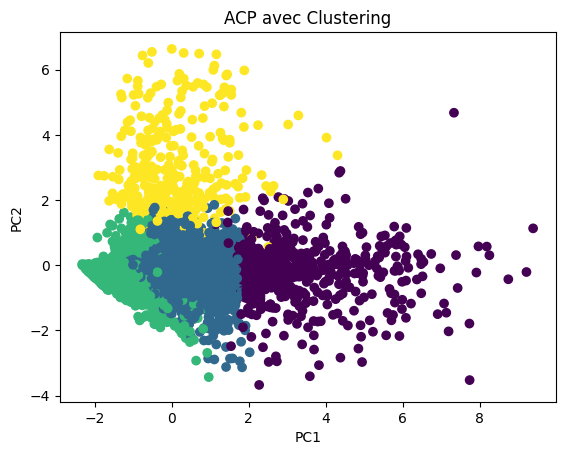

In [165]:

from sklearn.decomposition import PCA

pca = PCA()
X = pca.fit_transform(X_scaled)


# Scatter plot des composantes principales avec une couleur pour chaque cluster
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('ACP avec Clustering')
plt.show()


Segment 0 - "Clients Réguliers à Forte Valeur, Faible Taux d'Annulation" :

NombreCommandes élevé
MontantTotal_y élevé
Recency relativement faible
PanierMoyen élevé
PourcentageAnnulationMontant relativement faible
Description : Ce segment regroupe des clients réguliers qui effectuent un nombre élevé de commandes, dépensent des montants importants et ont un panier moyen élevé. De plus, ils ont un faible taux d'annulation des montants. Ces clients sont fidèles, dépensent généreusement et maintiennent des habitudes d'achat régulières.

Segment 1 - "Clients Récents à Valeur Moyenne, Faible Taux d'Annulation" :

NombreCommandes modéré
MontantTotal_y modéré
Recency relativement faible
PanierMoyen modéré
PourcentageAnnulationMontant relativement faible
Description : Ce segment comprend des clients récents qui ont effectué un nombre modéré de commandes et dépensé des montants moyens. Leur récence est relativement faible, indiquant une activité récente. De plus, ils ont un faible taux d'annulation des montants. Ces clients sont susceptibles d'être de nouveaux clients prometteurs.

Segment 2 - "Clients Récents à Faible Valeur, Taux d'Annulation Modéré" :

NombreCommandes faible
MontantTotal_y faible
Recency relativement élevée
PanierMoyen faible
PourcentageAnnulationMontant modéré
Description : Ce segment regroupe des clients récents qui ont effectué un nombre limité de commandes et dépensé des montants relativement faibles. Leur récence est relativement élevée, indiquant une certaine inactivité récente. De plus, ils ont un taux d'annulation des montants modéré. Ces clients peuvent nécessiter une attention particulière pour les inciter à augmenter leur engagement.

Segment 3 - "Clients Réguliers à Valeur Moyenne, Haut Taux d'Annulation" :

NombreCommandes modéré
MontantTotal_y modéré
Recency relativement élevée
PanierMoyen modéré
PourcentageAnnulationMontant élevé
Description : Ce segment comprend des clients réguliers qui ont effectué un nombre modéré de commandes et dépensé des montants moyens. Leur récence est relativement élevée, indiquant une certaine inactivité récente. Cependant, ils ont un taux d'annulation des montants élevé. Il est important de comprendre les raisons de leur taux d'annulation élevé et d'adopter des stratégies pour les fidéliser davantage.